In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
#import random seed
import random
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import copy as copy
%matplotlib inline
random.seed(0)
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Convolutional Neural Nets')
os.getcwd()

'/content/drive/My Drive/Convolutional Neural Nets'

In [ ]:
#open the input file as read only
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

In [ ]:
#load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [ ]:
#close this file
h5f.close()

In [ ]:
print('The shape of input features - training dataset :', X_train.shape)
print('The shape of output target - training dataset:', y_train.shape)
print('\nThe shape of input features - test dataset:', X_test.shape)
print('The shape of output target - test dataset:', y_test.shape)
print('\nThe shape of input features - validation dataset:', X_val.shape)
print('The shape of output target - validation dataset:', y_val.shape)

The shape of input features - training dataset : (42000, 32, 32)
The shape of output target - training dataset: (42000,)

The shape of input features - test dataset: (18000, 32, 32)
The shape of output target - test dataset: (18000,)

The shape of input features - validation dataset: (60000, 32, 32)
The shape of output target - validation dataset: (60000,)


The target values of first 5 images in the training dataset: [2 6 7 4 4]


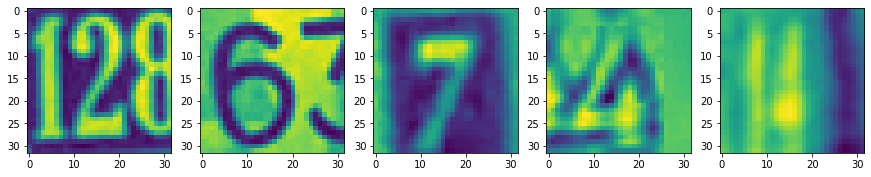

In [ ]:
#visulaize first 5 images from the training dataset

print('The target values of first 5 images in the training dataset:', y_train[0:5] )

plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i])

In [ ]:
#get the unique number of target output in the training dataset
print('Unique values of target output:', np.unique(y_train))
print('Unique count of target output:', len(np.unique(y_train)))

Unique values of target output: [0 1 2 3 4 5 6 7 8 9]
Unique count of target output: 10


The target values of first 5 images in the testing dataset: [1 7 2 9 0]


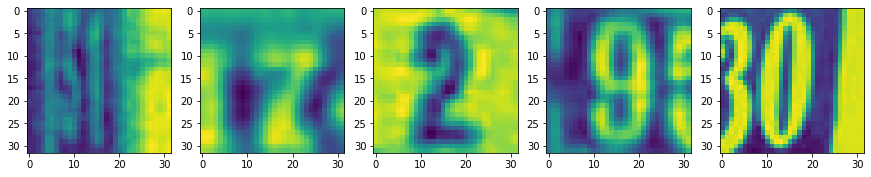

In [ ]:
#visulaize first 5 images from the testing dataset

print('The target values of first 5 images in the testing dataset:', y_test[0:5] )

plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i])

The target values of first 5 images in the validation dataset: [0 0 0 0 0]


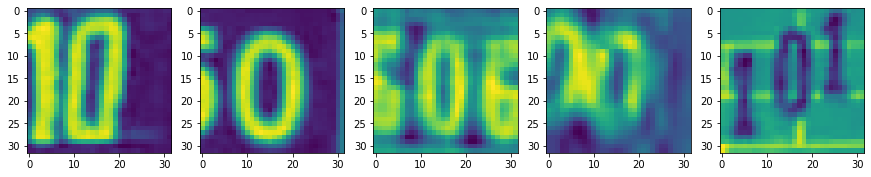

In [ ]:
#visulaize first 5 images from the validation dataset

print('The target values of first 5 images in the validation dataset:', y_val[0:5] )

plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_val[i])

In [ ]:
#we'll reshape the train, validation and test inputs in the format that can be fed into CNN
img_rows, img_cols = 32, 32

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
#convert the labeled y value into one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPool2D
from tensorflow.keras import regularizers, optimizers

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(lr = 0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

In [ ]:
model.fit(X_train, y_train, batch_size=200, epochs=10, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/10
210/210 [==============================] - 124s 585ms/step - loss: 36.5899 - accuracy: 0.1236 - val_loss: 1.5259 - val_accuracy: 0.4918
Epoch 2/10
210/210 [==============================] - 124s 591ms/step - loss: 1.2246 - accuracy: 0.6086 - val_loss: 0.8792 - val_accuracy: 0.7237
Epoch 3/10
210/210 [==============================] - 123s 588ms/step - loss: 0.8402 - accuracy: 0.7345 - val_loss: 0.7842 - val_accuracy: 0.7559
Epoch 4/10
210/210 [==============================] - 123s 587ms/step - loss: 0.7334 - accuracy: 0.7731 - val_loss: 0.6868 - val_accuracy: 0.7905
Epoch 5/10
210/210 [==============================] - 124s 589ms/step - loss: 0.6517 - accuracy: 0.7963 - val_loss: 0.6194 - val_accuracy: 0.8115
Epoch 6/10
210/210 [==============================] - 123s 587ms/step - loss: 0.5289 - accuracy: 0.8327 - val_loss: 0.5378 - val_accuracy: 0.8382
Epoch 7/10
210/210 [==============================] - 124s 589ms/step - loss: 0.4130 - accuracy: 0.8719 - val_loss: 0.4389 

In [ ]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.8173 - accuracy: 0.8226


[0.8172831535339355, 0.8226110935211182]

In [ ]:
#let's increase the layers to see whether there is any improvement in the accuracy score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(32, 32, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(X_train, y_train, batch_size=200, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
210/210 [==============================] - 5s 21ms/step - loss: 1.5956 - accuracy: 0.4681 - val_loss: 0.7814 - val_accuracy: 0.7559
Epoch 2/10
210/210 [==============================] - 4s 20ms/step - loss: 0.5417 - accuracy: 0.8340 - val_loss: 0.5607 - val_accuracy: 0.8281
Epoch 3/10
210/210 [==============================] - 4s 20ms/step - loss: 0.4288 - accuracy: 0.8673 - val_loss: 0.4145 - val_accuracy: 0.8763
Epoch 4/10
210/210 [==============================] - 4s 20ms/step - loss: 0.3763 - accuracy: 0.8826 - val_loss: 0.4197 - val_accuracy: 0.8707
Epoch 5/10
210/210 [==============================] - 4s 20ms/step - loss: 0.3345 - accuracy: 0.8981 - val_loss: 0.3667 - val_accuracy: 0.8927
Epoch 6/10
210/210 [==============================] - 4s 20ms/step - loss: 0.3018 - accuracy: 0.9060 - val_loss: 0.3678 - val_accuracy: 0.8921
Epoch 7/10
210/210 [==============================] - 4s 20ms/step - loss: 0.2644 - accuracy: 0.9179 - val_loss: 0.4414 - val_accuracy: 0.8697

In [ ]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.4414 - accuracy: 0.8697


[0.4414233863353729, 0.8696666955947876]

Predicted label: 8
Softmax Outputs: [[8.9282247e-07 2.0749311e-09 4.1858240e-07 1.9314683e-05 5.9194139e-07
  2.0698066e-07 5.4590007e-05 4.3174836e-08 9.9992347e-01 4.8059593e-07]]
1.0


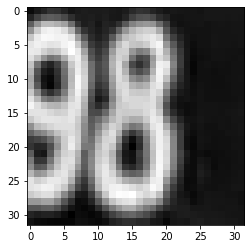

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[16].reshape(32,32), cmap='gray')
y_pred = model.predict(X_test[16].reshape(1, 32, 32, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())